## Data Analising

Попробуем проанализировать полученые результаты. Для начала подключим все нужныи модули и загрузим csv файл.

In [7]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
games_df = pd.read_csv('test_example.csv', sep=';', index_col=0)

In [3]:
games_df

,apm_p1,apm_p2,game_loops,game_seconds,game_version,map_name,path,race_p1,race_p2,win_player
0,386,384,20887,932.520447,3.16.1.55958,Меха-депо РВ,D:\Program Files (x86)\StarCraft II\Replays\3....,3,2,2
1,195,109,7279,324.978027,3.16.1.55958,Путь на Айур РВ,D:\Program Files (x86)\StarCraft II\Replays\3....,1,1,1
2,55,100,14944,667.189392,3.16.1.55958,Каталлена РВ (Void),D:\Program Files (x86)\StarCraft II\Replays\3....,1,2,2
3,138,137,17367,775.366577,3.16.1.55958,Путь на Айур РВ,D:\Program Files (x86)\StarCraft II\Replays\3....,2,1,1
4,138,162,12032,537.180359,3.16.1.55958,Меха-депо РВ,D:\Program Files (x86)\StarCraft II\Replays\3....,2,2,1
5,0,111,56,2.500175,3.16.1.55958,Одиссея РВ,D:\Program Files (x86)\StarCraft II\Replays\3....,2,2,2
6,134,53,7642,341.184509,3.16.1.55958,Незваный гость РВ,D:\Program Files (x86)\StarCraft II\Replays\3....,2,1,1
7,85,104,9021,402.751312,3.16.1.55958,Меха-депо РВ,D:\Program Files (x86)\StarCraft II\Replays\3....,3,2,1
8,190,172,13107,585.174744,3.16.1.55958,Каталлена РВ (Void),D:\Program Files (x86)\StarCraft II\Replays\3....,1,1,2
9,118,162,10959,489.275208,3.16.1.55958,Аколит РВ,D:\Program Files (x86)\StarCraft II\Replays\3....,3,3,1


Преобразуем поле *Race* в строковое представление. Добавим поле *Mutchup* и *Win_race*

In [5]:
games_df['race_p1'] = games_df['race_p1'].map({1:'Terran', 2: 'Zerg', 3: 'Protoss'})
games_df['race_p2'] = games_df['race_p2'].map({1:'Terran', 2: 'Zerg', 3: 'Protoss'})
def mutchup(row):
    p = sorted([row.race_p1,row.race_p2])
    return (p[0][0] + 'v' + p[1][0])                           
games_df['mutchup'] = games_df.apply(mutchup, axis=1)

def win_race(row):
    return {1: row.race_p1, 2: row.race_p2, 3: None}[row.win_player]
games_df['win_race'] = games_df.apply(win_race, axis=1)

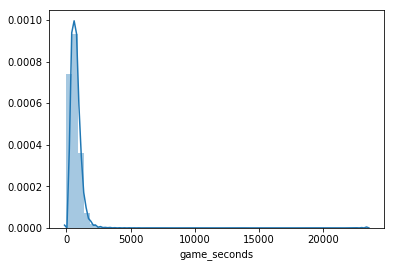

In [10]:
sns.distplot(games_df.game_seconds)

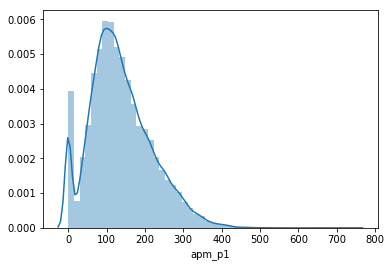

In [14]:
sns.distplot(games_df.apm_p1)

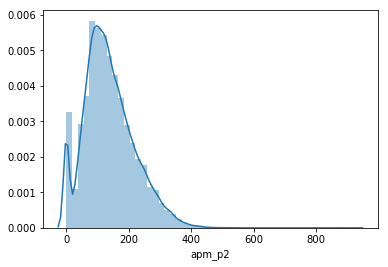

In [15]:
sns.distplot(games_df.apm_p2)

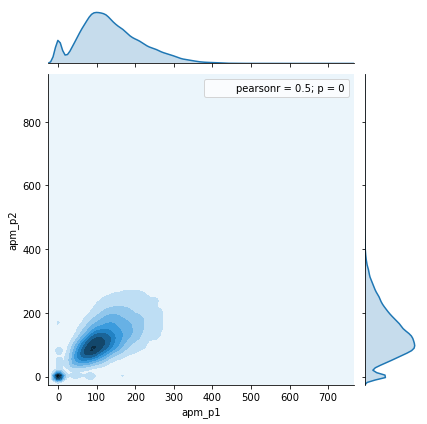

In [32]:
sns.jointplot(x="apm_p1", y="apm_p2", data=games_df, kind="kde")

## Отфильтруем невалидные реплеи

In [97]:
filter_games = games_df[(games_df.apm_p1 > 30) & (games_df.apm_p2 > 30)]
filter_games = filter_games[filter_games.win_race.notnull()]
filter_games.size

687828

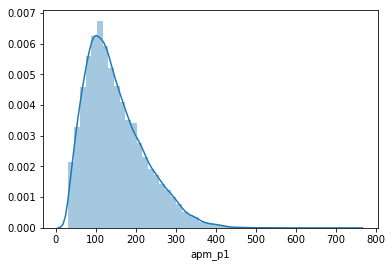

In [95]:
sns.distplot(filter_games.apm_p1)

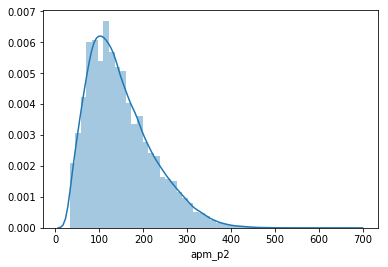

In [96]:
sns.distplot(filter_games.apm_p2)

In [90]:
filter_games[filter_games.win_race.isnull()].path.values

array([], dtype=object)

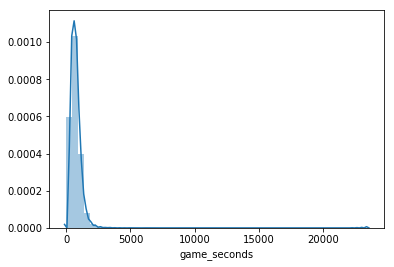

In [98]:
sns.distplot(filter_games.game_seconds)

In [128]:
mutchup_winrate = filter_games.groupby(['mutchup', 'win_race'])['mutchup'].count()
mutchup_winrate
#mutchup_winrate.unstack('win_race').plot(kind='bar', stacked=True)

mutchup  win_race
PvP      Protoss     4275
PvT      Protoss     6295
         Terran      6328
PvZ      Protoss     5202
         Zerg        5439
TvT      Terran      8426
TvZ      Terran      7532
         Zerg        7777
ZvZ      Zerg        6045
Name: mutchup, dtype: int64

In [132]:
filter_games[filter_games.apm_p2 < 60].count()

apm_p1          4072
apm_p2          4072
game_loops      4072
game_seconds    4072
game_version    4072
map_name        4072
path            4072
race_p1         4072
race_p2         4072
win_player      4072
mutchup         4072
win_race        4072
dtype: int64

Пример как получить целое значение ячейки

In [62]:
games_df[games_df.apm_p2 == games_df.apm_p2.max()].path.values[0]

'D:\\Program Files (x86)\\StarCraft II\\Replays\\3.16.1-Pack_1-fix\\Replays\\4825fa96c039077abcd98dfe88123aae1c5a3b4a23bfb419c9e1ab270feb56e6.SC2Replay'